# COVID-19 Risks for School Reopening in Different Areas

## 1. Project Title

Title: COVID-19 Risks for School Reopening in Different Areas

Team members: Songling Lu(A14571547), Jiali Qian (A15628856)

<font color='red'>Note: the code has been modified to directly run on AGOL</font>

## 2. Question(s) you addressed, why it is important

Since the outbreak of the COVID at the beginning of this year, students' way of studying has changed tremendously. Because of the pandemic, schools have been forced to shut down to prevent further virus spread, and students forced to studying remotely online. However, this situation can not go on forever and we will soon have to reopen the schools. Schools and parents are urging for reopen, but they need a way to evaluate the risk for doing so. This can be done by utilizing an existing agent-based model on COVID-19 that simulates how the virus could spread on campus.

However, this model is not exactly accurate as it generically considers every school in the same set of configurations. The schools would be testing on with the same set of infected patients at the start, which might not be the case in real life. In real life, students will have to commute between home and school, and they would bring the virus to campus if they are sick. This means that the probability of virus appearing on campus and the initial amount of infected case is related to the possibility of students being infected outside of campus. This possibility can be mainly determined by the possibility of getting infected at the region where live. Besides, the infection probability at the local region of the school campus can also somewhat affect the result.

Therefore, we decided to look at schools in different areas and determine their risks for having COVID-19 cases if they reopen. We will be looking at transportation data and search for where students of the school come from. Then we will determine regional COVID risks and corporate that with the travel information to determine the COVID-19 risk for school in a particular region.

## 3. Background and literature

1.	Agent-Based Model Github Repo
    
    Link: https://github.com/covABM
    
    This github repository includes the agent-based model for simulating COVID-19 spread on campus. This model is developed by Professor Ilya Zaslavsky and fellow students. We got the idea of our project from this repository and we hope our results can be used to help improve the model.

## 4. Python libraries or ArcGIS modules you used and why

For python libraries, we used matplotlib, geopandas, pandas and numpy. For ArcGIS we mainly used the its feature module.

- __Matplotlib__ We used matplotlib to plot some of our data into graph to better view them in a visualized way.

- __Geopandas__ We used geopandas to read in the shape files in our data.

- __Pandas__ We used pandas to handle dataframe and have done some preprocessing using it.

- __Numpy__ We used numpy for some arithmetic operations.

- __ArcGIS Feature Module__ It is mainly used for feature summarization. Using the summarize_within function provided in this module, we are able to turn our zip code based COVID data into MGRA based COVID data.

In [26]:
# Uncomment and run this cell to install packages
#!pip install geopandas
#!pip install mapclassify

In [5]:
# Package and Module import
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [ ]:
# Connect to GIS
# Please log in with your creditials to run the notebook
gis = GIS(username="")

## 5. Data sources

1.	https://drive.google.com/drive/folders/1lfHZsJVC-G3aMzlRz7Wa0VMMHCOfBvwY

    This link leads to the google drive for the San Diego MGRA shape file and the synthetic pop data with traveling information.

2.	https://sdgis-sandag.opendata.arcgis.com/datasets/covid19-case-rate-data-by-zip-code/data?geometry=-123.793%2C31.291%2C-109.950%2C34.519

    This link leads to the San Diego COVID-19 data based on zip code.
    
When we first proposed this project, we thought about how to determine what is the region that students come from in a different way. At first, we thought about creating a drive time buffer around the school and consider that as the region where students come from. After discussing with professor, we understand this is not accurate as the drive time buffer only considers drive time without traffic, and the resulting the region is going be extended along the highways. To better help us develop the project the professor gave us the transportation information data and the MGRA region shape file that those data build on. Using these datasets, we are able to better determine where the students of a school comes from.

In process of our project development, we have changed our COVID-19 case data several times. We looked for the most recent updated dataset in order to more accurately represent the COVID risk in the current situation.

In [15]:
# Load San Diego MGRA data and preview
sdFileIn = gis.content.get("cbecd214566d44beae5134c2d6d39ab0")
sandiego = gpd.read_file(sdFileIn.get_data())
sandiego

,MGRA,CT10,CT10BG,SRA,MSA,City,ZIP,Sphere,CPA,CPASG,...,Super,LUZ,Elem,Unif,High,Coll,Transit,Shape_STAr,Shape_STLe,geometry
0,1,100,1001,1,0,14,92103,1442,1442,0,...,4,95,0,30,0,4,1,7.068676e+05,4279.937852,"POLYGON ((6273121.001 1857292.000, 6273168.000..."
1,2,100,1001,1,0,14,92103,1442,1442,0,...,4,95,0,30,0,4,1,8.626222e+05,4319.416673,"POLYGON ((6274511.671 1856585.393, 6274516.000..."
2,3,100,1001,1,0,14,92103,1442,1442,0,...,4,95,0,30,0,4,1,1.210050e+06,5784.826051,"POLYGON ((6275324.959 1856523.875, 6275327.000..."
3,4,100,1001,1,0,14,92103,1442,1442,0,...,4,95,0,30,0,4,1,3.377363e+05,3061.645869,"POLYGON ((6276195.075 1855214.832, 6276194.150..."
4,5,100,1001,1,0,14,92103,1442,1442,0,...,4,95,0,30,0,4,1,3.008816e+05,2308.843439,"POLYGON ((6274743.000 1855817.000, 6274730.000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,22998,22100,221003,41,4,1,92011,103,0,0,...,5,14,0,6,0,2,2,1.789841e+06,5321.967895,"POLYGON ((6247931.000 1983715.375, 6248538.000..."
22998,22999,22100,221003,41,4,1,92011,103,0,0,...,5,14,0,6,0,2,2,1.468273e+06,4853.296700,"POLYGON ((6247942.000 1983056.000, 6247947.500..."
22999,23000,22100,221003,41,4,1,92011,103,0,0,...,5,14,0,6,0,2,2,1.321098e+06,4784.119538,"POLYGON ((6247200.500 1982113.750, 6247202.500..."
23000,23001,22100,221003,41,4,1,92011,103,0,0,...,5,14,0,6,0,2,2,1.785819e+06,5521.149402,"POLYGON ((6249376.787 1985018.725, 6249377.028..."


Then, we load in the COVID-19 Case Rate Data by Zipcode. The file contains 336 spatial objects and has 15 parameters. We mainly need its total case, population, and geometry data.

In [16]:
# Load San Diego COVID-19 case data by zip code and preview
covidFileIn = gis.content.get("341f8be5a5f74403bb98fa41249e6087")
covid = gpd.read_file(covidFileIn.get_data())
covid

,objectid,zip,zip_text_c,zip_code,total_case,new_cases_,population,f7_day_ave,positive_t,total_test,testing_po,previous_w,current_da,previous_1,geometry
0,1,91901.0,91901,91901,167,13,17986,10.325491,13,231,0.056277,7.148417,10/25/2020-10/31/2020,10/18/2020-10/24/2020,"POLYGON ((-12996038.867 3890080.229, -12995532..."
1,2,91902.0,91902,91902,367,13,17631,10.533395,12,364,0.032967,12.964178,10/25/2020-10/31/2020,10/18/2020-10/24/2020,"POLYGON ((-13021233.214 3856660.495, -13021180..."
2,3,72.0,91905 & 91906 & 91934 & 91962 & 91963 & 91980,91905 & 91906 & 91934 & 91962 & 91963 & 91980,182,18,9648,26.652452,15,151,0.099338,29.613836,10/25/2020-10/31/2020,10/18/2020-10/24/2020,"POLYGON ((-12970584.602 3883349.539, -12970499..."
3,4,91910.0,91910,91910,2373,69,83834,11.757930,78,1705,0.045748,11.757930,10/25/2020-10/31/2020,10/18/2020-10/24/2020,"POLYGON ((-13031455.246 3848954.228, -13031444..."
4,5,91911.0,91911,91911,3044,104,84819,17.516291,151,2835,0.053263,18.526846,10/25/2020-10/31/2020,10/18/2020-10/24/2020,"POLYGON ((-13029547.800 3846091.472, -13029541..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,337,77.0,92121 & 92130,92121 & 92130,579,44,64393,9.761487,45,2032,0.014888,7.986671,11/19/2020-11/25/2020,None,"POLYGON ((-13047399.164 3892534.202, -13047163..."
332,338,92173.0,92173,92173,2445,164,27097,86.461865,202,1179,0.087209,55.356682,11/19/2020-11/25/2020,None,"POLYGON ((-13031628.853 3838249.686, -13031502..."
333,339,92161.0,92093 & 92161,92093 & 92161,35,6,11300,7.585335,5,522,0.023438,0.000000,11/19/2020-11/25/2020,None,"POLYGON ((-13050542.574 3880716.543, -13050524..."
334,340,91914.0,91914,91914,506,53,16781,45.119055,63,631,0.026946,18.728664,11/19/2020-11/25/2020,None,"POLYGON ((-13018754.062 3853132.189, -13018264..."


Lastly, we load the 2020 synthetic population datasets. The datasets have transporation information that we will use for simulation.

In [19]:
# Load travel data, should take a while due to large dataset
indivtrips_file = gis.content.get("01c11f9a8d184d258b21ed887810ae63")
jointtrips_file = gis.content.get("7cc82200f7be440e8ac483339f95c7f7")
indivtrips = pd.read_csv(indivtrips_file.get_data())
jointtrips = pd.read_csv(jointtrips_file.get_data())

In [20]:
# Preview individual trips data
indivtrips.head()

,HH_ID,PERSON_ID,PERSON_NUM,TOUR_ID,STOP_ID,INBOUND,TOUR_PURPOSE,ORIG_PURPOSE,DEST_PURPOSE,ORIG_MGRA,...,TRIP_BOARD_TAZ,TRIP_ALIGHT_TAZ,LOC_IVT,EXP_IVT,BRT_IVT,LRT_IVT,CR_IVT,TRAN_DIST,PARK_WALK_TIME,PARK_WALK_DIST
0,264,719,1,0,0,0,School,Home,Escort,1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,264,719,1,0,1,0,School,Escort,School,219,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,264,719,1,0,0,1,School,School,Escort,212,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,264,719,1,0,1,1,School,Escort,Home,2610,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,264,719,1,0,0,0,Discretionary,Home,Eating Out,1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Preview joint trips data
jointtrips.head()

,HH_ID,TOUR_ID,STOP_ID,INBOUND,TOUR_PURPOSE,ORIG_PURPOSE,DEST_PURPOSE,ORIG_MGRA,DEST_MGRA,PARKING_MGRA,...,TRIP_BOARD_TAZ,TRIP_ALIGHT_TAZ,LOC_IVT,EXP_IVT,BRT_IVT,LRT_IVT,CR_IVT,TRAN_DIST,PARK_WALK_TIME,PARK_WALK_DIST
0,47,0,0,0,Shop,Home,Escort,2,3028,-1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47,0,1,0,Shop,Escort,Shop,3028,3139,-1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,0,2,0,Shop,Shop,Shop,3139,3060,-1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,0,0,1,Shop,Shop,Shop,3060,22553,-1,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47,0,1,1,Shop,Shop,Home,22553,2,0,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6. Data cleaning you have done

We have done data cleaning on the 2020 synthetic population dataset. In this dataset, there are multiple csv files. The two CSV files that include the data we need are indivtrip.csv and jointtrips.csv. In those two files, we have all the transportation information. Because the two files are huge in size, we decide to extract only the needed data from the two files and merged into one dataframe. Because we only care about where students come from, we only selected the travel records with a destination purpose of “school” or “university”. We believe these data can best represent students’ trips to schools.

In [22]:
# Data cleaning for travel data, extracting only the records we need
indivtrips_school = indivtrips[(indivtrips['TOUR_PURPOSE'] == 'School') | (indivtrips['TOUR_PURPOSE'] == 'University')]

jointtrips_school = jointtrips[(jointtrips['TOUR_PURPOSE'] == 'School') | (jointtrips['TOUR_PURPOSE'] == 'University')]

trips_school = pd.concat([indivtrips_school[['TOUR_PURPOSE', 'ORIG_MGRA', 'DEST_MGRA', 'ORIG_PURPOSE', 'DEST_PURPOSE']],
                          jointtrips_school[['TOUR_PURPOSE', 'ORIG_MGRA', 'DEST_MGRA', 'ORIG_PURPOSE', 'DEST_PURPOSE']]],
                         ignore_index = True)

trips_to_school = trips_school[(trips_school['DEST_PURPOSE'] == 'School') |
                               (trips_school['DEST_PURPOSE'] == 'University')].reset_index()

trips_to_school.head()

,index,TOUR_PURPOSE,ORIG_MGRA,DEST_MGRA,ORIG_PURPOSE,DEST_PURPOSE
0,1,School,219,212,Escort,School
1,4,School,1,1486,Home,School
2,6,School,1,65,Home,School
3,13,School,3141,22566,Escort,School
4,15,School,1,3404,Home,School


To make the COVID-19 dataset easier to work with, we also did some data cleaning. We kept the three columns: total_case, population, and geometry which are needed for analysis. And we dropped other columns.

In [23]:
# Data cleaning for COVID-19 case data, extracting only the attributes we need
covid_total = covid[['total_case','population','geometry']]
covid_total

,total_case,population,geometry
0,167,17986,"POLYGON ((-12996038.867 3890080.229, -12995532..."
1,367,17631,"POLYGON ((-13021233.214 3856660.495, -13021180..."
2,182,9648,"POLYGON ((-12970584.602 3883349.539, -12970499..."
3,2373,83834,"POLYGON ((-13031455.246 3848954.228, -13031444..."
4,3044,84819,"POLYGON ((-13029547.800 3846091.472, -13029541..."
...,...,...,...
331,579,64393,"POLYGON ((-13047399.164 3892534.202, -13047163..."
332,2445,27097,"POLYGON ((-13031628.853 3838249.686, -13031502..."
333,35,11300,"POLYGON ((-13050542.574 3880716.543, -13050524..."
334,506,16781,"POLYGON ((-13018754.062 3853132.189, -13018264..."


## 7. Descriptive Statistics


Let's plot the two shapefiles first and see what they look like.

<AxesSubplot:>

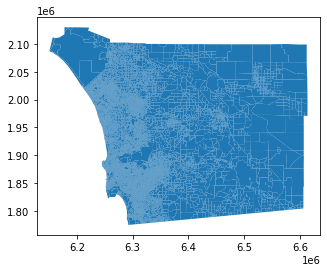

In [24]:
# Plot the San Diego MGRA region
sandiego.plot()

MGRA stands for master geographic reference areas. It is a geographic unit derived from census block or even sub-blocks in order to store certain information better. For example, demographic, economic or, in this case, transportation information. These blocks are usaully very small polygons as you can see in the above graph we plotted for San Diego MGRA.

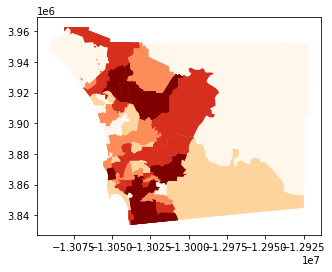

In [27]:
# Plot the San Diego zipcode region
covid.plot(column='total_case',cmap='OrRd', scheme='quantiles');

By contrast, the COVID-19 case rate by zipcode file is comprised of big zipcode polygons. We need to merge the two layers together later when performing analysis.

## 8. Analysis

The general approach of our analysis is that we first merge the two feature layer, MGRA and COVID-19 Case Rate, with ArcGIS Summarize_Within tool. After this, we would get a layer with an approximate number of cases and population for each MGRA. Because the synthetic population data uses MGRA to represent the origin and destination of every trip, having the case rate of each MGRA data is a must for further analysis. Then, we can start working on the synthetic population transportation dataset. By filtering the tour purpose and destination purpose, we are able to get all travels that are related to schools. Finally, we can come up with the model, where we compute the number of school-related travels between origin MGRAs and destination MGRAs. Combine the number of trips with the case rate in the corresponding MGRAs, we can generate risk score for school reopening assessment in every MGRA for the San Diego area. We can then convert the dataset into a feature layer, where we would visualize it in a choropleth map as the final result.

First, we convert the two loaded shapefile to SEDF and then to feature layer so that we can perform ArcGIS analysis with them.

In [28]:
# turn the COVID-19 case data into a feature layer
covid_sedf = arcgis.features.GeoAccessor.from_geodataframe(covid_total)
covid_fl = covid_sedf.spatial.to_featurelayer(title='COVID-19 in San Diego by Zipcodes', gis=gis)

In [29]:
# turn MGRA data into a feature layer
sd_sedf = arcgis.features.GeoAccessor.from_geodataframe(sandiego)
sd_fl = sd_sedf.spatial.to_featurelayer(title='San Diego MGRA13', gis=gis)

Now, we can use the ArcGIS Summarize_Within tool to combine the COVID-19 case layer with the San Diego MGRA layer. This way, we can get an approximate number of total cases and population for each MGRA, depending on the size of the polygon.

In [30]:
# summarize data to get COVID-19 data in MGRA region
covid_mgra = arcgis.features.analysis.summarize_within(sum_within_layer = sd_fl, 
                                                       summary_layer = covid_fl,
                                                       summary_fields = ['total_case Sum', 'population Sum'],
                                                       sum_shape = True,
                                                       output_name = 'COVID-19 Case Rates by MGRA Final')

We convert the resulting feature collection to a Spatially-Enabled DataFrame. This will make our subsequent analyses easier.

In [16]:
# get the COVID-19 data in MGRA to a dataframe
covid_data = pd.DataFrame.spatial.from_layer(covid_mgra.layers[0])
covid_data.head()

,AnalysisArea,CPA,CPASG,CT10,CT10BG,City,Coll,Council,Elem,High,...,SUM_population,SUM_total_case,Shape_STAr,Shape_STLe,Sphere,Super,TAZ,Transit,Unif,ZIP
0,0.000359,1909,190900,20305,203052,19,3,0,12,13,...,4,0,10020.732422,406.684205,700,3,901,2,0,92026
1,0.000541,0,0,19904,199041,18,3,0,0,0,...,8,0,15085.561523,508.428542,1800,5,688,2,42,92081
2,0.000474,0,0,20708,207082,7,3,0,12,13,...,4,0,13204.606445,511.041582,700,3,1342,2,0,92025
3,0.000775,1418,0,7600,76003,14,4,2,0,0,...,16,0,21594.668945,618.171976,1418,4,3079,1,30,92109
4,0.000851,1430,0,7100,71003,14,4,2,0,0,...,8,0,23735.906250,657.065388,1430,1,3921,1,30,92106


Now we can compute the case rate for each MGRA based on the total cases and population data, which was generated with the summarize_within tool.

In [17]:
# calculate the case rate
covid_data['case_rate'] = covid_data['SUM_total_case'] / covid_data['SUM_population']
mgra_case_rate = covid_data[['OBJECTID', 'case_rate', 'SHAPE']]
mgra_case_rate.head()

,OBJECTID,case_rate,SHAPE
0,1,0.0,"{""rings"": [[[-13035743.8829, 3915615.9684], [-..."
1,2,0.0,"{""rings"": [[[-13051477.9762, 3918987.0536], [-..."
2,3,0.0,"{""rings"": [[[-13030954.1039, 3908011.7042], [-..."
3,4,0.0,"{""rings"": [[[-13052348.3301, 3866341.1173], [-..."
4,5,0.0,"{""rings"": [[[-13049728.2895, 3858166.1526], [-..."


After all the prep work, we can work on the model. The function takes in the ID of one MGRA, and get all the trips that end in the selected MGRA. Depending on the case rate of the select MGRA and other MGRAs that the trips originated from, we can assign weights to these two parameters and get risk scores for every MGRA in the dataset.

In [18]:
# helper function to determine school risk coefficient in a MGRA region
def school_risk(mgra):
    tours = trips_to_school[trips_to_school['DEST_MGRA'] == mgra]
    
    rate_sum = 0
    trip_count = 0
    
    for i in range(tours.shape[0]):
        origin = tours['ORIG_MGRA'].iloc[0]
        rate_sum += mgra_case_rate[mgra_case_rate['OBJECTID'] == origin]['case_rate'].iloc[0]
        trip_count += 1
    
    if trip_count == 0:
        risk = 0
    else:
        risk = rate_sum/trip_count * 0.8 + mgra_case_rate[mgra_case_rate['OBJECTID'] == mgra]['case_rate'].iloc[0] * 0.2 
        
    return risk

Now, we can apply the function to every MGRA and compute the score.

In [19]:
# caculate the school risk coefficient for each MGRA region
mgra_case_rate['School Risk'] = mgra_case_rate['OBJECTID'].apply(school_risk)

c:\users\98245\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
mgra_case_rate

,OBJECTID,case_rate,SHAPE,School Risk
0,1,0.000000,"{""rings"": [[[-13035743.8829, 3915615.9684], [-...",0.000000
1,2,0.000000,"{""rings"": [[[-13051477.9762, 3918987.0536], [-...",0.000000
2,3,0.000000,"{""rings"": [[[-13030954.1039, 3908011.7042], [-...",NaN
3,4,0.000000,"{""rings"": [[[-13052348.3301, 3866341.1173], [-...",0.000000
4,5,0.000000,"{""rings"": [[[-13049728.2895, 3858166.1526], [-...",0.000000
...,...,...,...,...
22997,22998,0.006329,"{""rings"": [[[-12937464.7808, 3905451.5066], [-...",0.013461
22998,22999,0.006250,"{""rings"": [[[-12936219.9829, 3894056.4966], [-...",0.016936
22999,23000,0.023120,"{""rings"": [[[-12963685.1169, 3876127.3256], [-...",0.025137
23000,23001,0.005853,"{""rings"": [[[-12931279.5742, 3870865.56], [-12...",0.000000


Now, we can apply the function to every MGRA and compute the score.

In [21]:
# Turn the data into a feature layer
mgra_case_rate_fl = mgra_case_rate.spatial.to_featurelayer(title='COVID-19 Risks by MGRA in San Diego')

In [22]:
mgra_case_rate_fl

<Item title:"COVID-19 Risks by MGRA in San Diego" type:Feature Layer Collection owner:sol104_dsc170fa20>

## 9.Summary of products and results

The final result we achieved is a feature layer that includes the COVID-19 risk for schools in that MGRA region. We mapped this feature layer on to the San Diego map and achieve the graph below. We mapped it into a choropleth map using the value of the risk coefficient we derived. The larger the value, the higher the risk is in that MGRA region. In the graph, each little block is a MGRA region and the darker a region block is, the higher the risk coefficient is, meaning school is that MGRA region is more dangerous and more likely to have COVID-19 cases appear on campus if reopens. Since regions where no school travel record points to are assigned to 0, we can determine that the areas with dark color indicates that there is a school in that region. 

From the map we noticed that there are far more such dark colored regions on the map than the number of schools possibly in San Diego. This could possibly because that some school campuses covers more than one MGRA region and the travel records may point to different parts of the campus. This results in travel records pointing to multiple MGRA even though the students might be traveling to the same school. Therefore, when using this feature layer to determine risk for particularly school, we will have to determine which MGRA regions it covers and derive an overall risk for the whole campus using the data from each MGRA region.

In [27]:
# map our resulting feature layer
map1 = gis.map('San Diego', zoomlevel=12)
map1.add_layer(mgra_case_rate_fl, {'renderer':'ClassedColorRenderer',
                                          'field_name':'SchoolRisk',
                                          'opacity':0.75})
map1

MapView(layout=Layout(height='400px', width='100%'))

We also include a screenshot of the resulting feature layer because map widget cannot be displayed correctly in PDF file.

## 10. Discussion

In the project, we used the function summarize_within in ArcGIS library to derive the COVID-19 case rates for each MGRA region from the original data, which is sorted in zip code regions. This method derives the case number and population in each MGRA based on the proportion of zip code area in the region. This may not be an accurate estimation as the proportion of case number and population in a region may not be exactly same as the proportion of the area of the region. However, this is the best we can get using the current data. In order map the case rates in MGRA more accurately, we would need data on more detailed case number and population distributions.

Besides, in the project, we used a naïve prediction function to estimate the risk rate for a region. It is 20% of local community environment influence and 80% influence from regions where students travel to school from. This is only a naïve prediction function as the influence percentage are only our rough estimates. The real relation might not even be a linear regression. In order to have a better prediction function with more accurate estimation, we need to look at more researches regarding this topic.

## 11. Conclusions and future work

At the end, we believe that we achieved what we expected at start. We got a feature layer for the COVID-19 risks for schools in every MGRA region and this layer map can answer our initial question.

This feature layer can help us acquire information for schools in a particular region. Therefore, it can determine the possibility of having infection case on campus. Using this layer and spatial information of schools, we can derive a risk coefficient for each school. This can help when it comes to using the agent-based model for COVID-19 spread on campus. By evaluating the risk coefficient for different schools, we can estimate the possible initial COVID-19 case for the schools and run the model using different starting configuration for different schools. We can also expand the model to simulate the process of students going home and coming back to school and simulate possible inflow of the virus to campus every day.

The way we looked at the transportation information for students going to school can be extended to a broader field. It does not have to limit to only schools. We can look at all transportation information and determine the possible flow of COVID-19 cases between regions. This way we can predict which regions are more dangerous.